In [1]:
import os
import matplotlib.pyplot as plt
import json
import numpy as np

In [2]:
ROOT = os.getcwd()

vis = os.path.join(ROOT, "visualize")
fs = os.listdir(vis)
fs.sort()

In [5]:
fs

['drbc_1200.json',
 'drbc_200.json',
 'drbc_300.json',
 'drbc_3000.json',
 'drbc_5000.json']

In [3]:
jsns = []

for f in fs:
    f_ = open(os.path.join(vis, f), "r")
    jsns.append(json.load(f_))

In [4]:
jsns

[{'top1': [0.98,
   0.98,
   0.98,
   0.96,
   0.98,
   1.0,
   0.98,
   0.96,
   0.96,
   0.98,
   0.98,
   0.96,
   1.0,
   0.98,
   0.96,
   0.98,
   0.98,
   0.96,
   0.96,
   0.98,
   0.94,
   0.98,
   0.94,
   1.0,
   0.98,
   1.0,
   0.96,
   0.96,
   0.98,
   0.96],
  'top5': [0.968,
   0.948,
   0.968,
   0.948,
   0.96,
   0.956,
   0.96,
   0.96,
   0.964,
   0.956,
   0.964,
   0.96,
   0.96,
   0.968,
   0.968,
   0.98,
   0.968,
   0.944,
   0.94,
   0.96,
   0.96,
   0.964,
   0.94,
   0.964,
   0.96,
   0.956,
   0.96,
   0.972,
   0.96,
   0.936],
  'top10': [0.97,
   0.944,
   0.956,
   0.956,
   0.964,
   0.954,
   0.954,
   0.942,
   0.96,
   0.952,
   0.96,
   0.96,
   0.952,
   0.964,
   0.952,
   0.954,
   0.956,
   0.948,
   0.942,
   0.964,
   0.94,
   0.958,
   0.95,
   0.958,
   0.95,
   0.958,
   0.938,
   0.968,
   0.958,
   0.934],
  'kendal': [0.872120024004801,
   0.8535012602520504,
   0.862143948789758,
   0.8614854170834166,
   0.8508978595719143,
   

# Line Chart

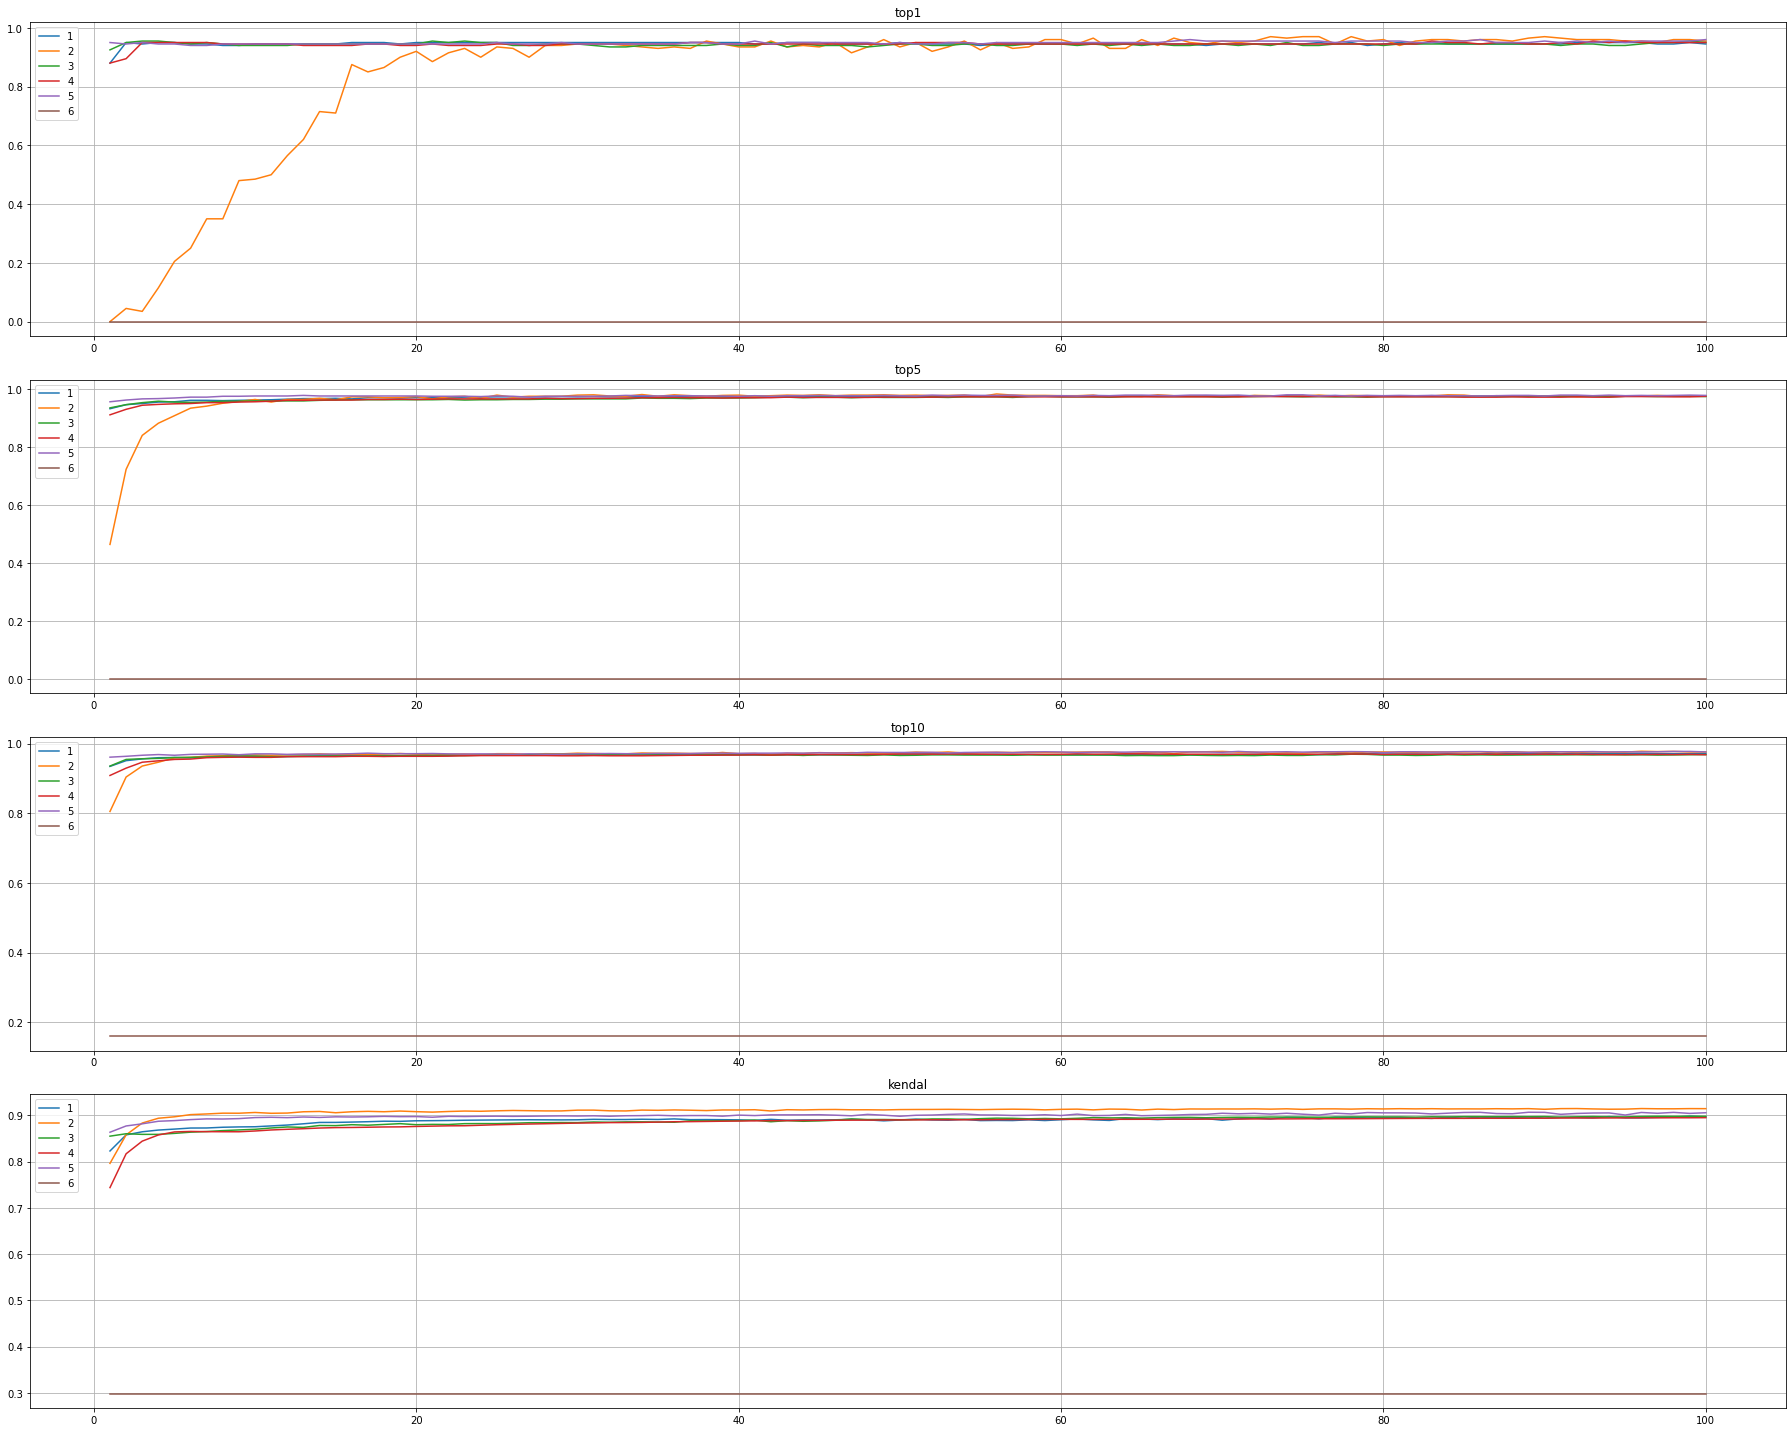

In [18]:
evaluation = ["top1", "top5", "top10", "kendal", "time"]
loss = ["bce", "mse"]
epochs = 100

x = np.linspace(1, epochs, epochs)

### plot bce loss and mean top N %
fig, axs = plt.subplots(len(evaluation), figsize=(25, 5 * len(evaluation)))
for index, ax in enumerate(axs):
    key = evaluation[index]

    for i in range(len(jsns)):
        ax.plot(x, jsns[i][key])
    
    ax.legend(range(1,7), loc='upper left')
    ax.set_title(key)
    ax.grid()

plt.tight_layout()
plt.savefig("validation.png", facecolor="white")

# Box Plot

['top1', 'top5', 'top10', 'kendal', 'time']


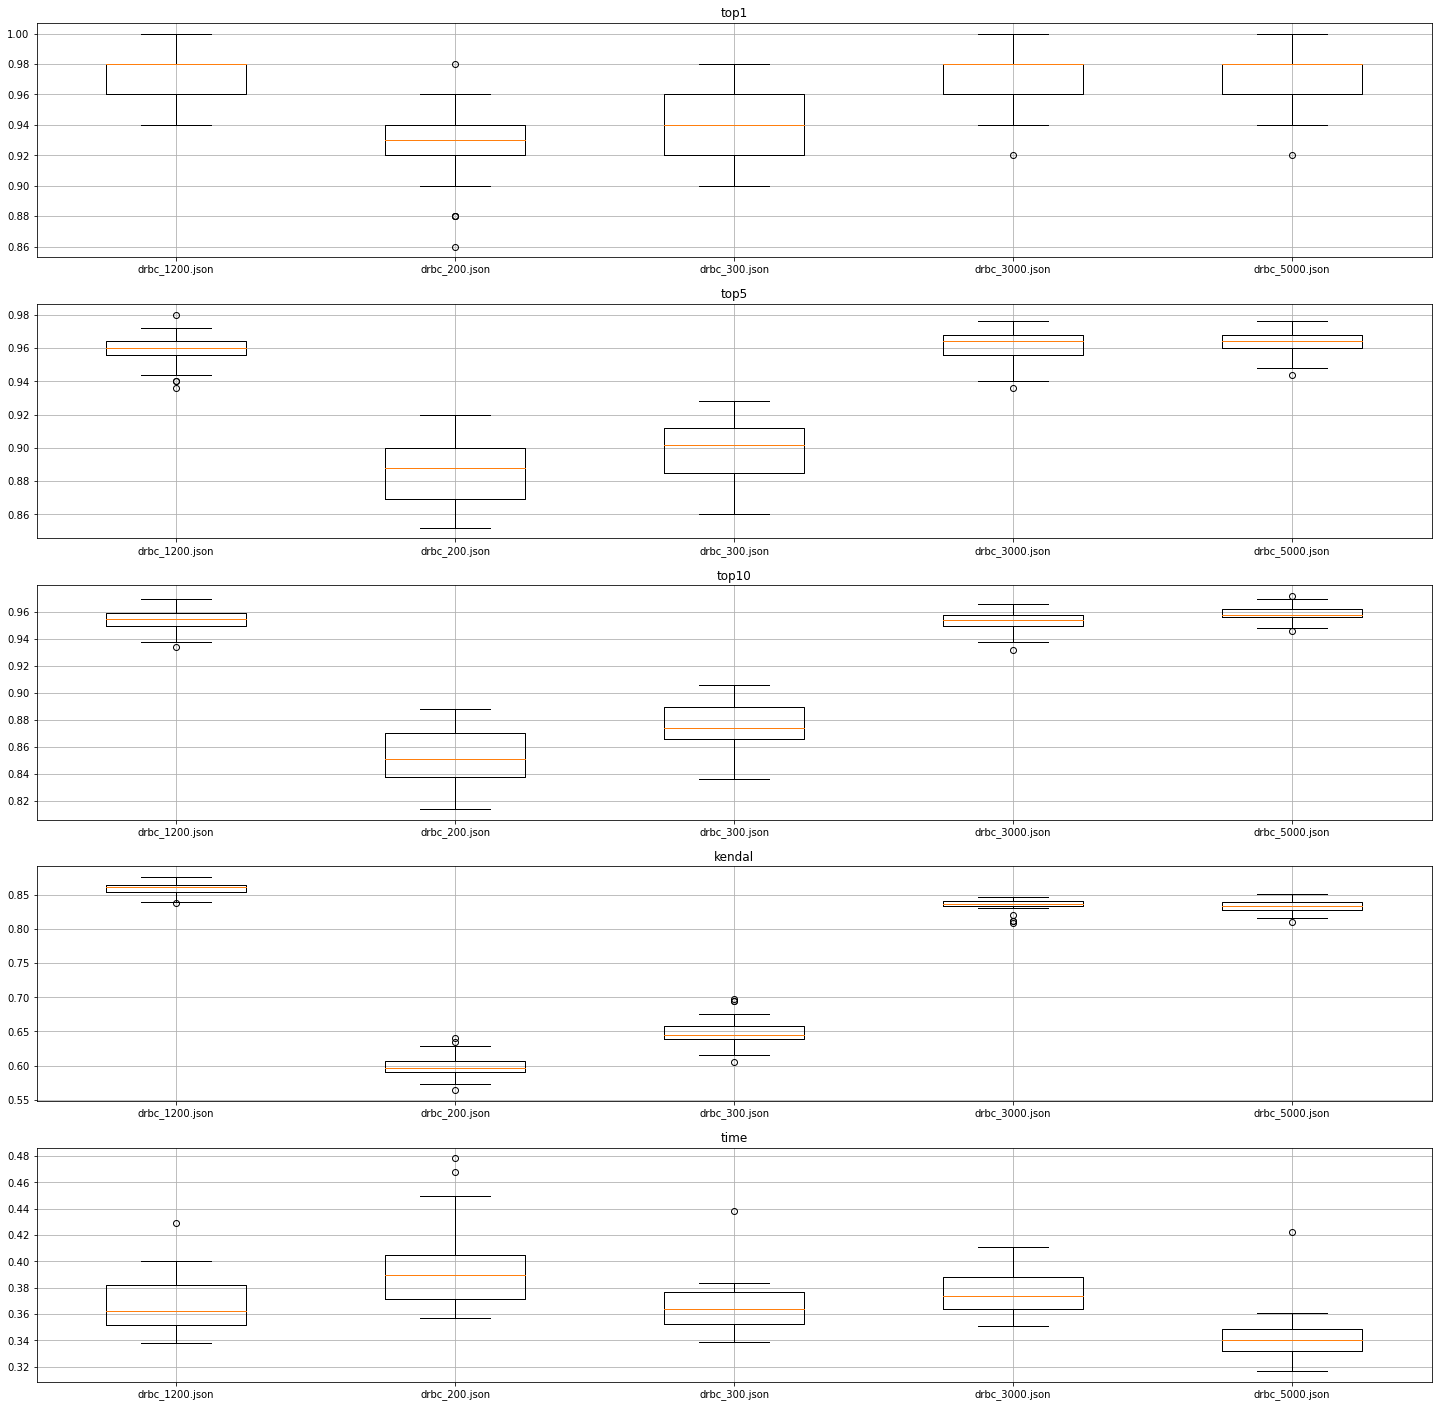

In [8]:
keys = list(jsns[0].keys())
print(keys)

fig, axs = plt.subplots(len(keys), figsize=(25, 5*len(keys)))
for index, ax in enumerate(axs):
    key = keys[index]

    p = []
    for j in jsns:
        p.append(j[key])
    
    ax.boxplot(p, widths=0.5)
    ax.set_title(key)
    ax.grid()

plt.setp(axs,  xticklabels=fs)
plt.savefig(os.path.join("scale.png"), facecolor="white")